In [1]:
import mne
import pandas as pd
import matplotlib.pyplot as plt

#file_dir = "C:/Users/Bruger/Documents/GitHub/edf/01_tcp_ar/002/00000297/s004_2012_02_28/00000297_s004_t000.edf"

file_dir = "C:/Users/Marc/Desktop/data/v2.1.0/edf/01_tcp_ar/004/00000458/s004_2003_02_12/00000458_s004_t001.edf" 
#013


file = mne.io.read_raw_edf(file_dir, preload=True)

Extracting EDF parameters from C:\Users\Marc\Desktop\data\v2.1.0\edf\01_tcp_ar\004\00000458\s004_2003_02_12\00000458_s004_t001.edf...
EDF file detected


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Marc\\Desktop\\data\\v2.1.0\\edf\\01_tcp_ar\\004\\00000458\\s004_2003_02_12\\00000458_s004_t001.edf'

In [5]:
data = file.filter(0.1, 100)
#have notch filter ved 60 Hz


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 13201 samples (33.002 sec)



In [21]:
data.info['sfreq']

400.0


In [7]:
df = data.to_data_frame()

In [8]:
columns = [col for col in df.columns]
print(columns)

['time', 'EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG A1-REF', 'EEG A2-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF', 'EEG ROC-REF', 'EEG LOC-REF', 'EEG EKG1-REF', 'EMG-REF', 'EEG 26-REF', 'EEG 27-REF', 'EEG 28-REF', 'EEG 29-REF', 'EEG 30-REF', 'EEG T1-REF', 'EEG T2-REF', 'PHOTIC-REF', 'IBI', 'BURSTS', 'SUPPR']


In [9]:
neworder = [da[:-4] for da in columns[1:-4]]
neworder.append(columns[-4][:-4])
print(neworder)

['EEG FP1', 'EEG FP2', 'EEG F3', 'EEG F4', 'EEG C3', 'EEG C4', 'EEG P3', 'EEG P4', 'EEG O1', 'EEG O2', 'EEG F7', 'EEG F8', 'EEG T3', 'EEG T4', 'EEG T5', 'EEG T6', 'EEG A1', 'EEG A2', 'EEG FZ', 'EEG CZ', 'EEG PZ', 'EEG ROC', 'EEG LOC', 'EEG EKG1', 'EMG', 'EEG 26', 'EEG 27', 'EEG 28', 'EEG 29', 'EEG 30', 'EEG T1', 'EEG T2', 'PHOTIC']


In [10]:
new = df[columns[1:-3]]
new.columns = neworder

In [11]:
namelist = neworder.copy()

In [12]:
for i in range(len(namelist) - 1): # len(namelist) - 1
    name = neworder[i]
    neworder = neworder[i+1:]
    names = [names+f"-{name}" for names in neworder]
    
    sub = new[name]
    rest = new[neworder]
    diff = rest.sub(sub, axis = 0)
    diff.columns = names
    
    df = pd.concat([df, diff], axis=1, join='inner')
    
    neworder = namelist.copy()

In [13]:
import matplotlib.pyplot as plt

In [14]:
df

,time,EEG FP1-REF,EEG FP2-REF,EEG F3-REF,EEG F4-REF,EEG C3-REF,EEG C4-REF,EEG P3-REF,EEG P4-REF,EEG O1-REF,...,EEG 30-EEG 29,EEG T1-EEG 29,EEG T2-EEG 29,PHOTIC-EEG 29,EEG T1-EEG 30,EEG T2-EEG 30,PHOTIC-EEG 30,EEG T2-EEG T1,PHOTIC-EEG T1,PHOTIC-EEG T2
0,0,2.041349e-13,-9.639235e-13,-2.202286e-14,3.227196e-13,1.016440e-13,1.355253e-14,-5.844527e-13,1.253609e-13,-8.639736e-13,...,-1.751664e-12,3.506716e-13,4.065758e-14,6.268044e-14,2.102336e-12,1.792322e-12,1.814345e-12,-3.100141e-13,-2.879912e-13,2.202286e-14
1,4,1.615121e+03,8.499009e+01,-2.105054e+03,1.220921e+03,3.223850e+02,7.593383e+01,-9.805938e+01,-1.847050e+03,9.035993e+01,...,-5.205073e-03,1.306695e+02,-1.656907e+02,6.395495e+00,1.306747e+02,-1.656855e+02,6.400700e+00,-2.963601e+02,-1.242740e+02,1.720862e+02
2,8,4.597596e+03,2.266579e+02,-6.516671e+03,3.449971e+03,8.969485e+02,1.814639e+02,-2.698856e+02,-5.282172e+03,2.231080e+02,...,-1.702400e-01,1.602947e+02,-5.184095e+02,-5.648459e+00,1.604649e+02,-5.182393e+02,-5.478219e+00,-6.787042e+02,-1.659431e+02,5.127610e+02
3,12,4.088020e+03,1.708607e+02,-5.622255e+03,3.063731e+03,7.884251e+02,1.524495e+02,-3.273202e+02,-4.717373e+03,1.746141e+02,...,-2.503061e-02,1.550742e+02,-4.344494e+02,3.222145e+01,1.550993e+02,-4.344244e+02,3.224648e+01,-5.895236e+02,-1.228528e+02,4.666708e+02
4,16,3.786144e+03,2.612494e+02,-5.284814e+03,2.839262e+03,7.346873e+02,1.471205e+02,-2.817321e+02,-4.361872e+03,2.503423e+02,...,1.335528e-01,1.662990e+02,-4.608260e+02,-3.407404e+01,1.661655e+02,-4.609595e+02,-3.420760e+01,-6.271250e+02,-2.003731e+02,4.267519e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314745,1258980,1.731693e-01,3.206337e-01,7.068303e-03,-4.793108e-02,-1.858274e-02,-1.777784e-02,-1.333115e-03,-1.539106e-02,6.194485e-02,...,-1.344652e-02,-5.708456e-02,2.333742e-03,-7.146470e-03,-4.363805e-02,1.578026e-02,6.300046e-03,5.941830e-02,4.993809e-02,-9.480211e-03
314746,1258984,1.298635e-01,2.404779e-01,5.403308e-03,-3.593158e-02,-1.389596e-02,-1.332569e-02,-9.560366e-04,-1.154360e-02,4.651613e-02,...,-9.978919e-03,-4.253302e-02,1.859197e-03,-5.252530e-03,-3.255410e-02,1.183812e-02,4.726389e-03,4.439221e-02,3.728049e-02,-7.111727e-03
314747,1258988,8.682912e-02,1.602896e-01,3.653977e-03,-2.394294e-02,-9.256403e-03,-8.932669e-03,-6.343863e-04,-7.735682e-03,3.099216e-02,...,-6.453503e-03,-2.811928e-02,1.502649e-03,-3.262412e-03,-2.166578e-02,7.956152e-03,3.191091e-03,2.962193e-02,2.485687e-02,-4.765061e-03
314748,1258992,4.337160e-02,8.002031e-02,1.794127e-03,-1.204191e-02,-4.631170e-03,-4.480683e-03,-3.176449e-04,-3.867013e-03,1.549015e-02,...,-3.046305e-03,-1.388731e-02,1.017238e-03,-1.404497e-03,-1.084100e-02,4.063543e-03,1.641807e-03,1.490455e-02,1.248281e-02,-2.421736e-03


In [49]:
print(df.columns)

Index(['time', 'EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF',
       'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF',
       ...
       'EEG 30-EEG 29', 'EEG T1-EEG 29', 'EEG T2-EEG 29', 'PHOTIC-EEG 29',
       'EEG T1-EEG 30', 'EEG T2-EEG 30', 'PHOTIC-EEG 30', 'EEG T2-EEG T1',
       'PHOTIC-EEG T1', 'PHOTIC-EEG T2'],
      dtype='object', length=565)


In [50]:
314750 /250

1259.0

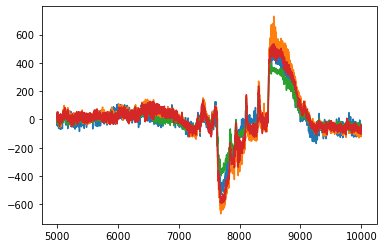

In [48]:
plt.plot(-1*df["EEG F7-EEG FP1"][250*20:250*40])
plt.plot(-1*df["EEG F8-EEG FP2"][250*20:250*40])
plt.plot(-1*df["EEG F3-EEG FP1"][250*20:250*40])
plt.plot(-1*df["EEG F4-EEG FP2"][250*20:250*40])
#plt.plot(-1*df["EEG F3-EEG FP1"][250*29:250*34])
#plt.plot(df["EEG FP1-REF"][250*29:250*34])
plt.show() # 013

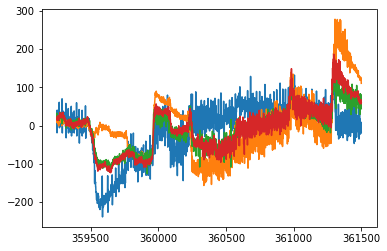

In [49]:
plt.plot(-1*df["F7-FP1"][250*1437:250*1446])
plt.plot(-1*df["F8-FP2"][250*1437:250*1446])
plt.plot(-1*df["F3-FP1"][250*1437:250*1446])
plt.plot(-1*df["F4-FP2"][250*1437:250*1446])
plt.show()

In [2]:
import pickle

In [17]:

df.to_pickle("input 1.pkl")

In [18]:
import csv

allnames = []
data = []
dir1_eeg = "C:/Users/Bruger/Documents/Uni/6. Semester/BP/data/v2.1.0/lists/edf_01_tcp_ar.list"

with open(dir1_eeg, "r") as file: # Læser csv-fil
    f = csv.reader(file)
    for rows in f:
        eeg = mne.io.read_raw_edf(rows[0], preload=True)
        dataframe = eeg.to_data_frame()
        allnames.append([i for i in dataframe.columns])


Extracting EDF parameters from C:\Users\Bruger\Documents\GitHub\edf\01_tcp_ar\002\00000254\s005_2010_11_15\00000254_s005_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360499  =      0.000 ...  1441.996 secs...
Extracting EDF parameters from C:\Users\Bruger\Documents\GitHub\edf\01_tcp_ar\002\00000254\s007_2013_03_25\00000254_s007_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 310999  =      0.000 ...  1243.996 secs...
Extracting EDF parameters from C:\Users\Bruger\Documents\GitHub\edf\01_tcp_ar\002\00000297\s004_2012_02_28\00000297_s004_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 362499  =      0.000 ...  1449.996 secs...
Extracting EDF parameters from C:\Users\Bruger\Documents\GitHub\edf\01_tcp_ar\004\00000458\s004_2003_02_12\00000458_s004_t001.edf...
EDF file detected
Setting channel info structure

In [19]:
allnames

[['time',
  'EEG FP1-REF',
  'EEG FP2-REF',
  'EEG F3-REF',
  'EEG F4-REF',
  'EEG C3-REF',
  'EEG C4-REF',
  'EEG P3-REF',
  'EEG P4-REF',
  'EEG O1-REF',
  'EEG O2-REF',
  'EEG F7-REF',
  'EEG F8-REF',
  'EEG T3-REF',
  'EEG T4-REF',
  'EEG T5-REF',
  'EEG T6-REF',
  'EEG A1-REF',
  'EEG A2-REF',
  'EEG FZ-REF',
  'EEG CZ-REF',
  'EEG PZ-REF',
  'EEG ROC-REF',
  'EEG LOC-REF',
  'EEG EKG1-REF',
  'EMG-REF',
  'EEG 26-REF',
  'EEG 27-REF',
  'EEG 28-REF',
  'EEG 29-REF',
  'EEG 30-REF',
  'EEG T1-REF',
  'EEG T2-REF',
  'PHOTIC-REF',
  'IBI',
  'BURSTS',
  'SUPPR'],
 ['time',
  'EEG FP1-REF',
  'EEG FP2-REF',
  'EEG F3-REF',
  'EEG F4-REF',
  'EEG C3-REF',
  'EEG C4-REF',
  'EEG P3-REF',
  'EEG P4-REF',
  'EEG O1-REF',
  'EEG O2-REF',
  'EEG F7-REF',
  'EEG F8-REF',
  'EEG T3-REF',
  'EEG T4-REF',
  'EEG T5-REF',
  'EEG T6-REF',
  'EEG A1-REF',
  'EEG A2-REF',
  'EEG FZ-REF',
  'EEG CZ-REF',
  'EEG PZ-REF',
  'EEG ROC-REF',
  'EEG LOC-REF',
  'EEG EKG1-REF',
  'EEG T1-REF',
  'EEG T2-

In [24]:
diffnames = set()

for i in allnames:
    for j in i:
        diffnames.add(j)

In [26]:
diffnames

{'BURSTS',
 'EEG 26-REF',
 'EEG 27-REF',
 'EEG 28-REF',
 'EEG 29-REF',
 'EEG 30-REF',
 'EEG 31-REF',
 'EEG 32-REF',
 'EEG A1-REF',
 'EEG A2-REF',
 'EEG C3-REF',
 'EEG C3P-REF',
 'EEG C4-REF',
 'EEG C4P-REF',
 'EEG CZ-REF',
 'EEG EKG-REF',
 'EEG EKG1-REF',
 'EEG F3-REF',
 'EEG F4-REF',
 'EEG F7-REF',
 'EEG F8-REF',
 'EEG FP1-REF',
 'EEG FP2-REF',
 'EEG FZ-REF',
 'EEG LOC-REF',
 'EEG LUC-REF',
 'EEG O1-REF',
 'EEG O2-REF',
 'EEG P3-REF',
 'EEG P4-REF',
 'EEG PZ-REF',
 'EEG RESP1-REF',
 'EEG RESP2-REF',
 'EEG RLC-REF',
 'EEG ROC-REF',
 'EEG SP1-REF',
 'EEG SP2-REF',
 'EEG T1-REF',
 'EEG T2-REF',
 'EEG T3-REF',
 'EEG T4-REF',
 'EEG T5-REF',
 'EEG T6-REF',
 'EMG-REF',
 'IBI',
 'PHOTIC-REF',
 'SUPPR',
 'time'}

In [22]:
len(diffnames)

48

In [31]:
for i in allnames:
    print(len(i))

37
31
31
33
33
37
30
30
30
30
30
31
33
31
31
31
32
37
37
37
33
30
30
30
30
37
37
30
30
30
30
37
37
37
28
31
28
37
30
30
30
37
31
37
37
37
31
37
31
37
37
37
37
37
37
37
35
37
31
31
31
37
37
37
37
31
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
35
35
37
37
37
37
35
35
35
35
35
35
35
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
31
32
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
31
37
30
30
37
37
37
37
37
37
30
37
37
37
37
35
37
37
37
34
34
34
30
35
35
35
35
37
30
37
35
35
35
28
35
29
37
37
31
31
31
34
37
37
37
37
31
37
31
31
31
34
34
34
34
31
31
32
31
31
37
37
31
31
31
31
31
31
35
31
32
31
32
31
35
35
35
35
35
35
35
35
35
31
31
31
31
32
31
37
31
31
37
31
32
32
34
28
32
32
37
31
31
37
28
31
31
35
31
37
37
35
35
31
31
31
31
32
37
31
31
28
31
31
31
35
31
28
29
37
29
34
34
29
37
31
35
35
35
35
35
30
30
31
31
37
28
31
31
31
31
37
31
29
31
34
34
34
34
28
34
34
31


In [35]:
always = set(i for i in allnames[0])

for i in allnames:
    set2 = set(j for j in i)
    always = always.intersection(set2)

In [36]:
print(len(always))
print(always)

24
{'EEG T5-REF', 'EEG O2-REF', 'EEG A2-REF', 'EEG FP1-REF', 'EEG F3-REF', 'EEG T2-REF', 'EEG P4-REF', 'EEG FZ-REF', 'EEG T6-REF', 'EEG F8-REF', 'EEG F7-REF', 'EEG C3-REF', 'EEG PZ-REF', 'EEG T3-REF', 'EEG T1-REF', 'EEG O1-REF', 'EEG C4-REF', 'time', 'EEG F4-REF', 'EEG P3-REF', 'EEG CZ-REF', 'EEG T4-REF', 'EEG FP2-REF', 'EEG A1-REF'}


In [139]:
import mne
import pandas as pd
import matplotlib.pyplot as plt

#file_dir = "C:/Users/Bruger/Documents/GitHub/edf/01_tcp_ar/002/00000297/s004_2012_02_28/00000297_s004_t000.edf"

file_dir = r"C:\Users\Marc\Desktop\data_series\v2.1.0\edf\01_tcp_ar\002\00000254\s007_2013_03_25\00000254_s007_t000.edf"
#013


file = mne.io.read_raw_edf(file_dir, preload=True)

Extracting EDF parameters from C:\Users\Marc\Desktop\data_series\v2.1.0\edf\01_tcp_ar\002\00000254\s007_2013_03_25\00000254_s007_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 310999  =      0.000 ...  1243.996 secs...


In [140]:
data = file.filter(0.1, 100)
data = data.notch_filter(60)
data = data.resample(sfreq=200)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 8251 samples (33.004 sec)

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition ba

In [141]:
df = data.to_data_frame()

In [142]:
yes = df["EEG FP1-REF"]-df["EEG F7-REF"]

In [143]:
yes

0          1.801331
1         -2.810677
2         10.381350
3          4.253592
4          5.529383
            ...    
248795    -0.393798
248796     0.096913
248797     0.123305
248798    -0.250118
248799    -0.070874
Length: 248800, dtype: float64

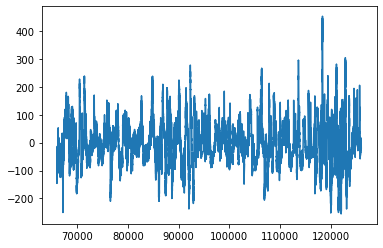

In [144]:
plt.plot(yes[66000:66000+60000])

In [74]:
yes[66000:66000+60000]

66000     -2.115290
66001     -2.036369
66002      0.068532
66003      1.391292
66004      2.112468
            ...    
125995   -13.022887
125996   -11.879378
125997   -10.662508
125998   -10.773803
125999    -9.782185
Length: 60000, dtype: float64

In [75]:
import torch

In [76]:
dat = torch.load(r"C:\Users\Marc\Desktop\wierd\ind.pt")

In [77]:
dat

tensor([[[ -2.1153,  -2.0364,   0.0685,  ..., -10.6625, -10.7738,  -9.7822]]])

In [78]:
d = dat.view(-1).numpy()

In [159]:
k = 0
for j in d == -200:
    k += 1
    if j:
        break

In [93]:
k

16632

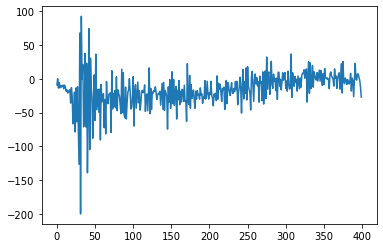

In [96]:
plt.plot(d[16600:17000])

In [52]:
d

array([ -2.1152897 ,  -2.0363688 ,   0.06853162, ..., -10.662508  ,
       -10.773803  ,  -9.782186  ], dtype=float32)

In [53]:
yes[66000:66000+60000]

66000     -8.590306
66001     -8.723686
66002     -8.313500
66003     -4.850536
66004     -3.892063
            ...    
125995   -11.736018
125996   -11.650839
125997   -10.872620
125998    -9.739892
125999    -8.432570
Length: 60000, dtype: float64

In [55]:
import numpy as np

In [129]:
input_data = np.memmap("C:/Users/Marc/Desktop/data_mclass/val_model_data" + "/model_input.dat", dtype='float32', mode='r', shape=(28, 22, 549200))
target = np.memmap("C:/Users/Marc/Desktop/data_mclass/val_model_data" + "/model_target.dat", dtype='float32', mode='r', shape=(28, 22, 549200))

In [166]:
jo = input_data[1, 0, 66000:66000+60000]
tar = target[1, 0, 66000:66000+60000]

In [154]:
tar = target[1, 0, 0:66000+60000]

In [160]:
k = 0
for i in tar:
    if i != 0:
        k += 1
        j = 1
    elif j:
        print(k/200)
        k = 0
        j = 0

2.0
28.0
13.0
7.0
3.0
13.0
52.0
9.0
4.0
12.0
10.0
2.0
196.0
10.0
3.0
11.0
6.0
7.0
7.0
17.0
2.0
52.0


In [162]:
73-46

27

In [165]:
66000/200

330.0

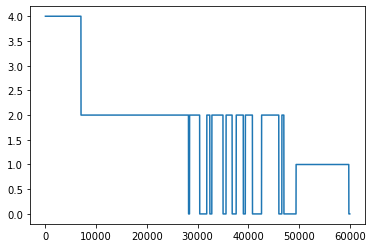

In [167]:
plt.plot(tar)

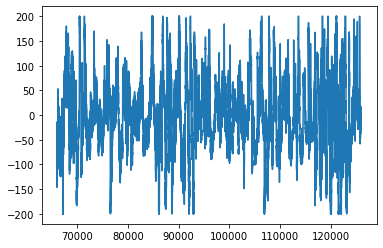

In [148]:
yes = df["EEG FP1-REF"]-df["EEG F7-REF"]
yes.loc[yes < -200] = -200
yes.loc[yes > 200] = 200
plt.plot(yes[66000:66000+60000])

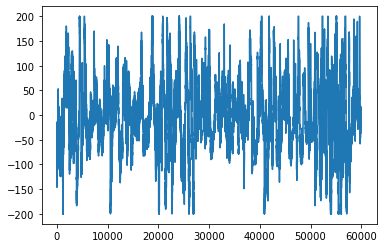

In [137]:
plt.plot(jo)

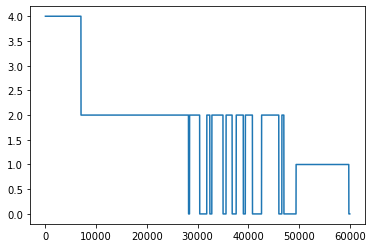

In [138]:
plt.plot(tar)

In [181]:
jo[tar == 0]

array([  8.014497 ,  -3.2831457,   4.7623663, ..., -18.026794 ,
       -16.710855 , -18.904984 ], dtype=float32)

In [182]:
jo = input_data[1, 0, 66000:66000+60000]
tar = target[1, 0, 66000:66000+60000]

([<matplotlib.axis.XTick at 0x20ba98570d0>,
 [Text(0, 0, '5:30'), Text(60000, 0, '10:30')])

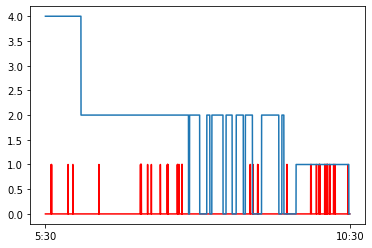

In [197]:
plt.plot(np.abs(jo) > 200-200/1000, color = "r")
plt.plot(tar)
plt.xticks(ticks=[0, 60000], labels=["5:30", "10:30"])

In [185]:
len(np.abs(jo) > 200-200/1000)

60000

In [168]:
plt.plot()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

0        -4.855323
1         4.702729
2        -2.060336
3        -1.513912
4         2.950192
            ...   
288395    0.310727
288396   -0.054476
288397   -0.107894
288398    0.215303
288399    0.035466
Length: 288400, dtype: float64


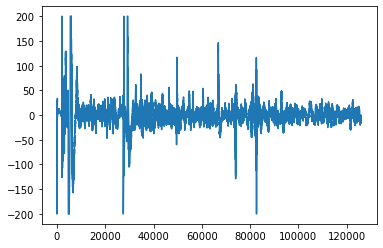

In [69]:
yes = df["EEG FP1-REF"]-df["EEG F3-REF"]
yes.loc[yes < -200] = -200
yes.loc[yes > 200] = 200
print(yes)
plt.plot(yes[:66000+60*5*200])